In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
from pathlib import Path

In [ ]:
# Pour Colab
from google.colab import files
import zipfile
from pathlib import Path

In [ ]:
from google.colab import drive
from pathlib import Path

In [ ]:
# Monter Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

path = Path("/content/drive/MyDrive")
print(path.exists())   # doit afficher True
print(list(path.iterdir()))

True
[Path('/content/drive/MyDrive/Colab Notebooks'), Path('/content/drive/MyDrive/seg_train'), Path('/content/drive/MyDrive/00130.MTS'), Path('/content/drive/MyDrive/UNHCR_Personal_History_Form_-_05_Nov.pdf'), Path('/content/drive/MyDrive/Document sans titre.gdoc'), Path('/content/drive/MyDrive/Document sans titre.docx'), Path('/content/drive/MyDrive/Formulaire sans titre.gform'), Path('/content/drive/MyDrive/Planification des rotations (1).gsheet'), Path('/content/drive/MyDrive/Planification des rotations.gsheet'), Path('/content/drive/MyDrive/Suivi des devoirs.gsheet'), Path('/content/drive/MyDrive/CURRICULUM VITAE new Fadji Eqsy distibution.docx'), Path("/content/drive/MyDrive/Demande d'emploi easy disribution.docx"), Path('/content/drive/MyDrive/Classroom'), Path('/content/drive/MyDrive/Partie III rédaction d’un article scientifique.gdoc'), Path('/content/drive/MyDrive/Methodologie de recherche URGENT (1).gdoc'), Path('/content/drive/MyDrive/Methodologie de recherche URGENT.gdoc'

In [ ]:
import fastai
print(f"Version FastAI: {fastai.__version__}")

Version FastAI: 2.8.6


In [ ]:
from fastai.vision.all import *

In [ ]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=32)

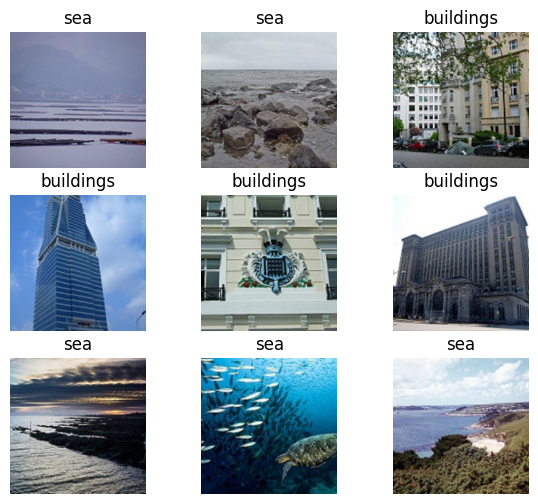

In [ ]:
data.show_batch(max_n=9, nrows=3, figsize=(7,6))
#pour visualiser les donnees

In [ ]:
print("Classes dans le dataset :", data.vocab)
print("Nombre de classes :", len(data.vocab))
print("Taille du dataset d'entraînement :", len(data.train_ds))
print("Taille du dataset de validation :", len(data.valid_ds))
#pour la vérification des informations du dataset

Classes dans le dataset : ['MyDrive', 'buildings', 'sea']
Nombre de classes : 3
Taille du dataset d'entraînement : 3546
Taille du dataset de validation : 886


In [ ]:
learn = vision_learner(data, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.0020892962347716093)

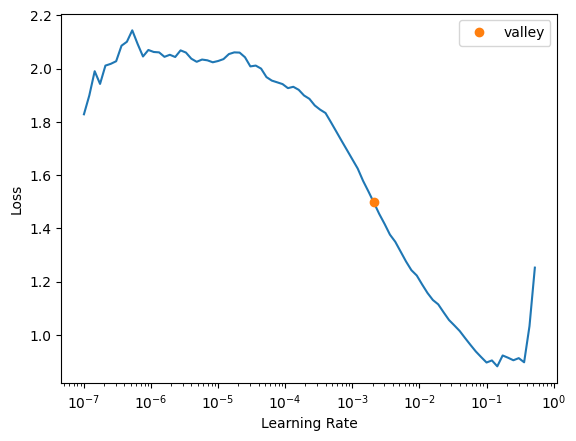

In [ ]:
learn.lr_find()

In [ ]:
import numpy as np
import torch

print(np.__version__)
print(torch.__version__)

1.26.4
2.9.0+cpu


In [ ]:
data

In [ ]:
from fastai.vision.all import *

dls = ImageDataLoaders.from_folder('/content/drive/MyDrive/seg_train/seg_train', valid_pct=0.2, item_tfms=Resize(224))

In [ ]:
print(dls.vocab)
len(dls.vocab)

['buildings', 'sea']


2

In [ ]:
from fastai.vision.all import *

# Création des DataLoaders
dls = ImageDataLoaders.from_folder(
    '/content/drive/MyDrive/seg_train/seg_train',
    valid_pct=0.2,
    item_tfms=Resize(224)
)

# Afficher les classes
print("Classes :", dls.vocab)
print("Nombre de classes :", len(dls.vocab))

Classes : ['buildings', 'sea']
Nombre de classes : 2


In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('/content/seg_train/seg_train'),path = Path("."))

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
type(learn)
type(learn.recorder)

fastai.learner.Recorder

In [ ]:
path = r"C:\Users\HP\Desktop\DATAMINING_ML\seg_train"

SuggestedLRs(valley=0.0010000000474974513)

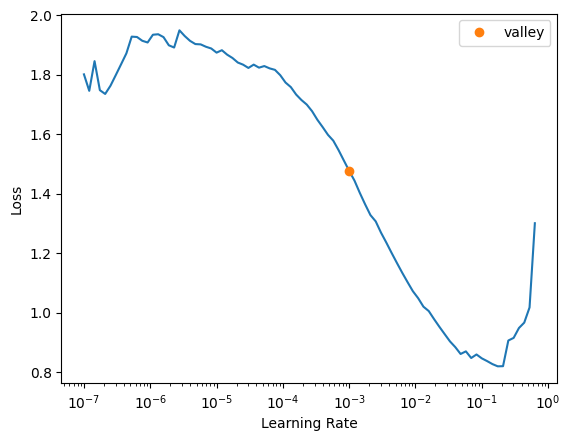

In [ ]:
learn.lr_find(show_plot=True)

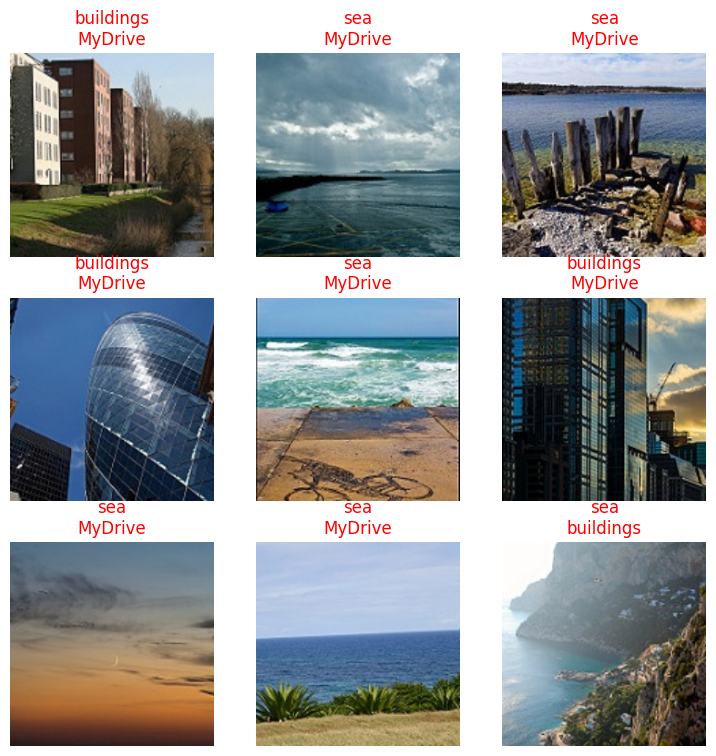

In [ ]:
learn.show_results()

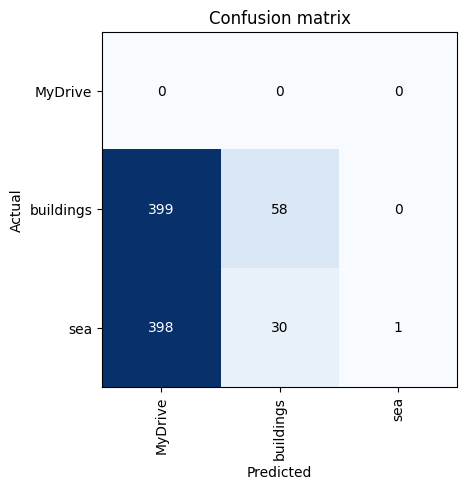

In [ ]:
# Créer la matrice de confusion
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

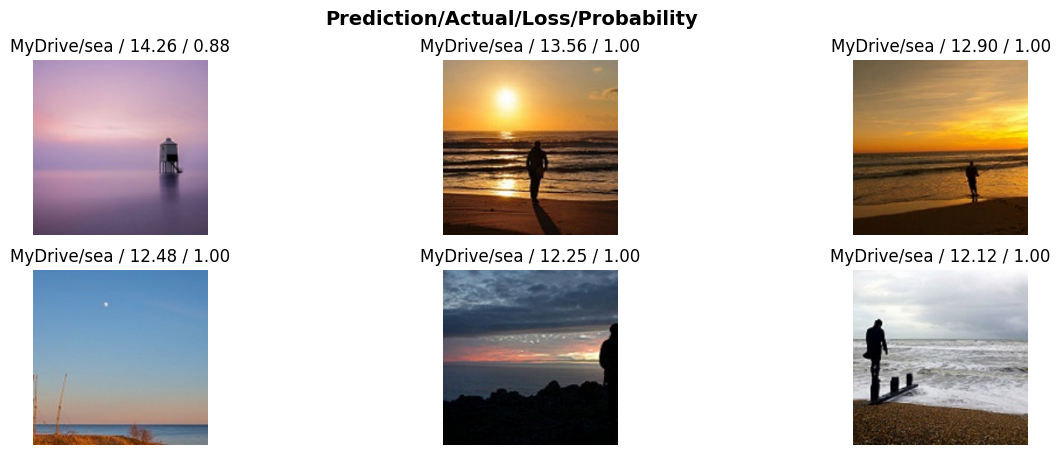

In [ ]:
# Afficher les pires prédictions
interp.plot_top_losses(6, figsize=(15,5))

Prédiction avec le modèle **entraîné**

In [ ]:
# Test avec une image (remplacez le chemin par une de vos images)
img = PILImage.create('/content/drive/MyDrive/seg_train/seg_train/buildings/321.jpg')
print("Prédiction :", learn.predict(img)[0])

Prédiction : MyDrive


In [ ]:
# Version alternative - prédiction sur une image du dataset
test_img = data.valid_ds[0][0]  # Première image de validation
print("Prédiction :", learn.predict(test_img)[0])
print("Vraie classe :", data.valid_ds[0][1])

Prédiction : MyDrive
Vraie classe : TensorCategory(1)


Sauvegarde et chargement du modèle

In [ ]:
import os
print("Répertoire actuel :", os.getcwd())

Répertoire actuel : /content


In [ ]:
# Sauvegarder le modèle avec le chemin complet
learn.export(os.path.join(os.getcwd(), 'image_classifier_model.pkl'))

In [ ]:
# Vérifier que le fichier a été créé
import os
print("Fichier créé :", os.path.exists('image_classifier_model.pkl'))
print("Taille du fichier :", os.path.getsize('image_classifier_model.pkl'), "bytes")

Fichier créé : True
Taille du fichier : 47023758 bytes


In [ ]:
# Test de chargement du modèle pour vérifier qu'il fonctionne
from fastai.vision.all import *
loaded_learn = load_learner('image_classifier_model.pkl')
print("✅ Modèle chargé avec succès !")
print("Classes disponibles :", loaded_learn.dls.vocab)

✅ Modèle chargé avec succès !
Classes disponibles : ['MyDrive', 'buildings', 'sea']


/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
# Test pour vérifier si le modèle existe
import os
print("Fichier modèle existe :", os.path.exists('image_classifier_model.pkl'))
print("Répertoire actuel :", os.getcwd())

Fichier modèle existe : True
Répertoire actuel : /content


In [ ]:
# Sauvegarder le modèle avec le chemin complet
learn.export(os.path.join(os.getcwd(), 'image_classifier_model.pkl'))

In [ ]:
# Vérifier que la sauvegarde a réussi
import os
model_path = os.path.join(os.getcwd(), 'image_classifier_model.pkl')
print("Fichier créé :", os.path.exists(model_path))
print("Taille du fichier :", os.path.getsize(model_path), "bytes")
print("Chemin complet :", model_path)

Fichier créé : True
Taille du fichier : 47023758 bytes
Chemin complet : /content/image_classifier_model.pkl


In [ ]:
# Test de chargement du modèle
from fastai.vision.all import *
loaded_learn = load_learner(model_path)
print("Modèle chargé avec succès !")

Modèle chargé avec succès !


/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
from fastai.vision.all import *
import os

x = '/content/drive/MyDrive/seg_train/seg_train'
path = Path(x)

np.random.seed(40)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=32)

In [ ]:
learn = vision_learner(data, resnet18, metrics=accuracy)

In [ ]:
learn = vision_learner(data, resnet18, metrics=accuracy, cbs=[])

SuggestedLRs(valley=0.0014454397605732083)

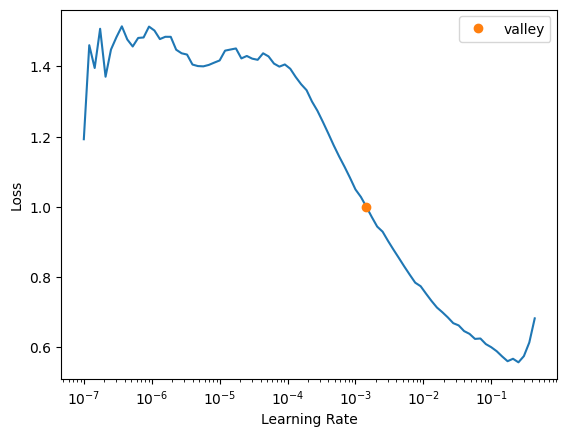

In [ ]:
learn.lr_find()

LR minimum: 0.025118863582611083, LR steepest: 4.365158383734524e-05


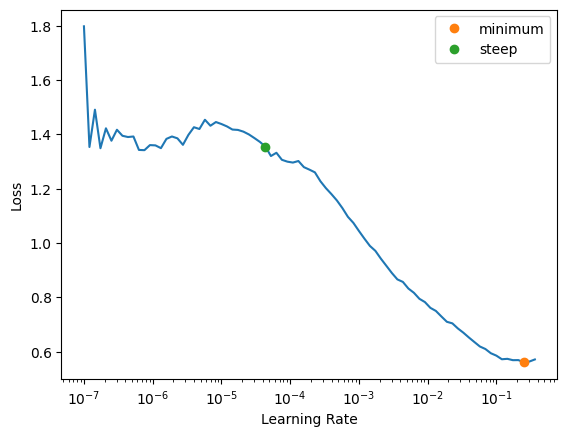

In [ ]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"LR minimum: {lr_min}, LR steepest: {lr_steep}")

In [ ]:
type(learn)

fastai.learner.Learner

In [ ]:
import fastprogress
fastprogress.fastprogress.NO_BAR = True

In [ ]:
from fastai.callback.progress import ProgressCallback
learn.remove_cb(ProgressCallback)

In [ ]:
learn.fit_one_cycle(5, lr_max=1e-3)

[0, 0.1933113932609558, 0.015918705612421036, 0.994356632232666, '12:16']
[1, 0.05360966920852661, 0.009854436852037907, 0.994356632232666, '11:51']
[2, 0.0306097324937582, 0.013938295654952526, 0.994356632232666, '11:46']
[3, 0.021173106506466866, 0.011064437218010426, 0.9954853057861328, '11:29']
[4, 0.01795886643230915, 0.009682352654635906, 0.9954853057861328, '11:29']


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-5, 1e-4))

[0, 0.03098803572356701, 0.012630178593099117, 0.994356632232666, '17:19']
[1, 0.011339782737195492, 0.012428848072886467, 0.993228018283844, '16:18']
[2, 0.0140459556132555, 0.018583638593554497, 0.9966139793395996, '16:22']
[3, 0.007083502132445574, 0.013543518260121346, 0.9977426528930664, '16:31']
[4, 0.005056594032794237, 0.015491542406380177, 0.9954853057861328, '16:36']


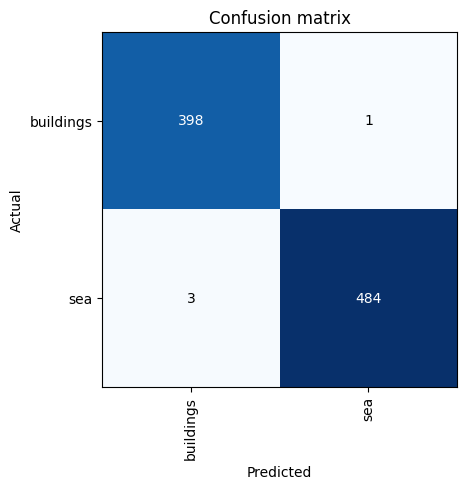

In [ ]:
# ==========================================
# 6️⃣ ÉVALUATION
# ==========================================
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
# Sauvegarde simple (.pth)
learn.save('image_classifier_model.pkl')

Path('/content/drive/MyDrive/seg_train/seg_train/models/image_classifier_model.pkl.pth')

In [ ]:
# Export complet (recommandé pour déploiement Flask)
learn.export('image_classifier_model.pkl')

print("✅ Modèle sauvegardé avec succès !")

✅ Modèle sauvegardé avec succès !
